# Import Packages

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime


#### Set display option to maximum columns for dataframe and do not show any warings

In [2]:
pd.set_option('display.max_columns', None) 
pd.options.mode.chained_assignment = None 

# Loading Data and viewing it by all process

In [3]:
loan_df = pd.read_csv("loan.csv",low_memory=False)
loan_df.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,NaN,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer,860xx,AZ,27.65,0,Jan-85,1,NaN,NaN,3,0,13648,83.70%,9,f,0.00,0.00,5863.155187,5833.84,5000.00,863.16,0.00,0.00,0.00,Jan-15,171.62,NaN,May-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I plan to use t...,car,bike,309xx,GA,1.00,0,Apr-99,5,NaN,NaN,3,0,1687,9.40%,4,f,0.00,0.00,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,NaN,Sep-13,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,NaN,10+ years,RENT,12252.0,Not Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,small_business,real estate business,606xx,IL,8.72,0,Nov-01,2,NaN,NaN,2,0,2956,98.50%,10,f,0.00,0.00,3005.666844,3005.67,2400.00,605.67,0.00,0.00,0.00,Jun-14,649.91,NaN,May-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.0,Source Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/21/11 > to pay for prop...,other,personel,917xx,CA,20.00,0,Feb-96,1,35.0,NaN,10,0,5598,21%,37,f,0.00,0.00,12231.890000,12231.89,10000.00,2214.92,16.97,0.00,0.00,Jan-15,357.48,NaN,Apr-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN

#### Shape of the input data

In [4]:
loan_df.shape

(39717, 111)

##### Column and data types

In [5]:
loan_df.info(verbose = True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 111 columns):
 #    Column                          Dtype  
---   ------                          -----  
 0    id                              int64  
 1    member_id                       int64  
 2    loan_amnt                       int64  
 3    funded_amnt                     int64  
 4    funded_amnt_inv                 float64
 5    term                            object 
 6    int_rate                        object 
 7    installment                     float64
 8    grade                           object 
 9    sub_grade                       object 
 10   emp_title                       object 
 11   emp_length                      object 
 12   home_ownership                  object 
 13   annual_inc                      float64
 14   verification_status             object 
 15   issue_d                         object 
 16   loan_status                     object 
 17   pymnt_plan

# Cleaning the Data

##### The below function to find the eligible and non eligible columns by checking for percentage of nulls in the columns. The threshold percentage for deciding eligible and non eligible columns can be passed as parameter to this function

In [6]:
def findAcceptableNonacceptableColumns(loan_df,percent):
    acceptable_columns = loan_df[loan_df.columns[loan_df.isnull().sum() < percent * len(loan_df)]].columns
    non_acceptable_columns = loan_df[loan_df.columns[loan_df.isnull().sum() > percent * len(loan_df)]].columns
    return acceptable_columns,non_acceptable_columns

### Removing Null column which are very much eligible and also the column which are very much unique and not import for the analysis

#### We have considered columns which have null values more than 35% is not an acceptable column for this analysis.

In [7]:
acceptable_columns,non_acceptable_columns = findAcceptableNonacceptableColumns(loan_df,0.35)

In [8]:
acceptable_columns

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade', 'emp_title',
       'emp_length', 'home_ownership', 'annual_inc', 'verification_status',
       'issue_d', 'loan_status', 'pymnt_plan', 'url', 'desc', 'purpose',
       'title', 'zip_code', 'addr_state', 'dti', 'delinq_2yrs',
       'earliest_cr_line', 'inq_last_6mths', 'open_acc', 'pub_rec',
       'revol_bal', 'revol_util', 'total_acc', 'initial_list_status',
       'out_prncp', 'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv',
       'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee', 'recoveries',
       'collection_recovery_fee', 'last_pymnt_d', 'last_pymnt_amnt',
       'last_credit_pull_d', 'collections_12_mths_ex_med', 'policy_code',
       'application_type', 'acc_now_delinq', 'chargeoff_within_12_mths',
       'delinq_amnt', 'pub_rec_bankruptcies', 'tax_liens'],
      dtype='object')

In [9]:
non_acceptable_columns

Index(['mths_since_last_delinq', 'mths_since_last_record', 'next_pymnt_d',
       'mths_since_last_major_derog', 'annual_inc_joint', 'dti_joint',
       'verification_status_joint', 'tot_coll_amt', 'tot_cur_bal',
       'open_acc_6m', 'open_il_6m', 'open_il_12m', 'open_il_24m',
       'mths_since_rcnt_il', 'total_bal_il', 'il_util', 'open_rv_12m',
       'open_rv_24m', 'max_bal_bc', 'all_util', 'total_rev_hi_lim', 'inq_fi',
       'total_cu_tl', 'inq_last_12m', 'acc_open_past_24mths', 'avg_cur_bal',
       'bc_open_to_buy', 'bc_util', 'mo_sin_old_il_acct',
       'mo_sin_old_rev_tl_op', 'mo_sin_rcnt_rev_tl_op', 'mo_sin_rcnt_tl',
       'mort_acc', 'mths_since_recent_bc', 'mths_since_recent_bc_dlq',
       'mths_since_recent_inq', 'mths_since_recent_revol_delinq',
       'num_accts_ever_120_pd', 'num_actv_bc_tl', 'num_actv_rev_tl',
       'num_bc_sats', 'num_bc_tl', 'num_il_tl', 'num_op_rev_tl',
       'num_rev_accts', 'num_rev_tl_bal_gt_0', 'num_sats', 'num_tl_120dpd_2m',
       'num_t

### Removing Null columns

In [10]:
cleaned_loan_df = loan_df[acceptable_columns]

### Removing non important columns

#### Removing columns related to customer behaviour which comes after the loan gets approved hence it is not possible to decide the behaviour during the time of taking defalting decision.

#### Reading the list of all cutomer behavior columns from Loan behavior variable.txt file

In [11]:
with open('Loan behaviour variables.txt') as f:
    lines = f.readlines()

behaviour_columns = lines[0].split(',')
cleaned_loan_df.drop(behaviour_columns,axis=1,inplace=True)

#### Dropping url, description and title columns as these columns are helful to identify the objective of this exercise

In [12]:
cleaned_loan_df.drop(['url','desc','title'],axis=1,inplace=True)

### Removing unique columns

In [13]:
cleaned_loan_df.drop(['id','member_id'],axis=1,inplace=True)
cleaned_loan_df.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,purpose,zip_code,addr_state,dti,initial_list_status,collections_12_mths_ex_med,policy_code,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens
0,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,NaN,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,n,credit_card,860xx,AZ,27.65,f,0.0,1,0,0.0,0,0.0,0.0
1,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,n,car,309xx,GA,1.00,f,0.0,1,0,0.0,0,0.0,0.0
2,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,NaN,10+ years,RENT,12252.0,Not Verified,Dec-11,Fully Paid,n,small_business,606xx,IL,8.72,f,0.0,1,0,0.0,0,0.0,0.0
3,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.0,Source Verified,Dec-11,Fully Paid,n,other,917xx,CA,20.00,f,0.0,1,0,0.0,0,0.0,0.0
4,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,University Medical Group,1 year,RENT,80000.0,Source Verified,Dec-11,Current,n,other,972xx,OR,17.94,f,0.0,1,0,0.0,0,0.0,0.0


##### Removing columns with only one unique value which is not going to help us in analysis

In [14]:
unique_value_columns = cleaned_loan_df.nunique()
final_unique_columns_tobe_removed = unique_value_columns[unique_value_columns.values == 1]
cleaned_loan_df.drop(final_unique_columns_tobe_removed.index.tolist(),axis=1,inplace=True)

### Drop Duplicate data from the columns

In [15]:
cleaned_loan_df = cleaned_loan_df.drop_duplicates()

##### Shape of the data

In [16]:
cleaned_loan_df.shape

(39717, 20)

In [17]:
cleaned_loan_df['loan_status'].value_counts()

Fully Paid     32950
Charged Off     5627
Current         1140
Name: loan_status, dtype: int64

#### Considering only "Fully Paid" and "Charged Off" information from the data to perform the analysis. This is becuase on going loan will not help us to perform the defaulting loan analysis.

In [18]:
loan_df_final_data = cleaned_loan_df[cleaned_loan_df['loan_status'] != 'Current']
loan_df_final_data.shape

(38577, 20)

##### Checking if some data is having loan amount lesser then funded or approved loan amount to remove bad data

In [19]:
loan_df_final_data[(loan_df_final_data.loan_amnt < loan_df_final_data.funded_amnt) |  (loan_df_final_data.loan_amnt < loan_df_final_data.funded_amnt_inv) | ( loan_df_final_data.funded_amnt_inv > loan_df_final_data.funded_amnt)].shape

(0, 20)

## Creating a derived column from a column or fixing a column value or data type

#### create term_in_months and term in years of type int in place of term which is string. This will help to determine the loan tenure.

In [20]:
loan_df_final_data['term_in_months'] = loan_df_final_data['term'].apply(lambda x : int(x.replace("months",'').strip()))
loan_df_final_data['term_in_years'] = (loan_df_final_data['term_in_months']/12).astype('int64')
loan_df_final_data.drop(['term'],axis=1,inplace=True)

#### we have splitted Loan Issue date to month and year to derive some meaningful insights

In [21]:
loan_df_final_data['loan_issue_month'] = loan_df_final_data['issue_d'].apply(lambda x : x.split("-")[0].strip())
loan_df_final_data['loan_issue_year'] = loan_df_final_data['issue_d'].apply(lambda x : datetime.strptime(x, '%b-%y').year)
loan_df_final_data.drop(['issue_d'],axis=1,inplace=True)

##### Removed "%" from rate of interest and converted the data type to nuermic

In [22]:
loan_df_final_data['int_rate'] = loan_df_final_data.int_rate.apply(lambda x:x.replace('%','').strip()).apply(pd.to_numeric)

##### Removed unnecessary string from Emp_leanth which is bacially the employee years of experience and converted it to float datatype

In [23]:
loan_df_final_data['emp_length'] =loan_df_final_data['emp_length'].str.replace("years","")
loan_df_final_data['emp_length']=loan_df_final_data['emp_length'].str.replace("+","").str.replace("< 1","0")
loan_df_final_data['emp_length']=loan_df_final_data['emp_length'].str.replace("year","")
loan_df_final_data['emp_length']=loan_df_final_data['emp_length'].astype('float64')

/tmp/ipykernel_10549/4180482395.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  loan_df_final_data['emp_length']=loan_df_final_data['emp_length'].str.replace("+","").str.replace("< 1","0")


##### Convert Loan Status as a numeric column, so that percentage of Charged-off applicant or defaulter can be calculated

In [24]:
## Converted "Charged Off" status as 1 and "Fully Paid" satus as 0
loan_df_final_data['loan_status_bool']= loan_df_final_data['loan_status'].map({'Charged Off':1,'Fully Paid':0})

### Check Shape of loan_df_final_data after creation of derived columns

In [25]:
loan_df_final_data.shape

(38577, 23)

## Filling up the missing value wherver we can

##### Check for NA Counts in all columns

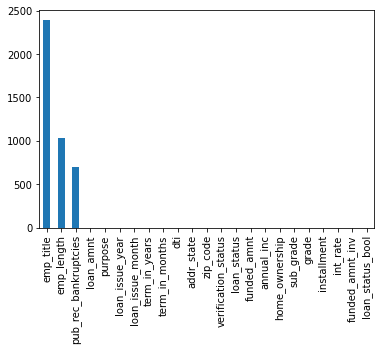

In [26]:
loan_df_final_data.isna().sum().sort_values(ascending=False).plot.bar()
plt.show()

##### Considering NA in "emp_title" as self-employed

In [27]:
loan_df_final_data.emp_title.fillna('self_employed',inplace=True)
loan_df_final_data.emp_title.isna().sum()

0

##### Checking for Null Values in emp_length column

In [28]:
loan_df_final_data[loan_df_final_data.emp_length.isna()].head()

,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,loan_status,purpose,zip_code,addr_state,dti,pub_rec_bankruptcies,term_in_months,term_in_years,loan_issue_month,loan_issue_year,loan_status_bool
168,2500,2500,2500.0,7.51,77.78,A,A3,self_employed,NaN,OWN,12000.0,Source Verified,Charged Off,debt_consolidation,961xx,CA,16.30,0.0,36,3,Dec,2011,1
323,18000,18000,18000.0,17.58,452.98,D,D4,self_employed,NaN,MORTGAGE,60000.0,Verified,Fully Paid,debt_consolidation,363xx,AL,21.96,0.0,60,5,Dec,2011,0
394,4000,4000,4000.0,11.71,132.31,B,B3,self_employed,NaN,RENT,24000.0,Source Verified,Fully Paid,home_improvement,328xx,FL,7.50,0.0,36,3,Dec,2011,0
422,1000,1000,1000.0,14.65,34.50,C,C3,self_employed,NaN,RENT,18408.0,Not Verified,Charged Off,major_purchase,080xx,NJ,6.00,1.0,36,3,Dec,2011,1
439,8250,8250,8250.0,7.51,256.67,A,A3,self_employed,NaN,MORTGAGE,31500.0,Verified,Fully Paid,debt_consolidation,218xx,MD,17.87,0.0,36,3,Dec,2011,0


##### Here we see that, emp_length is null where ever the emp_tile is also null or as we considered in the previous step, most of the self_employed employees didn't share their work experince in years. Hence we are replacing the nulls with mode value of the column

In [29]:
emp_length_mode = loan_df_final_data.emp_length.mode()[0]
loan_df_final_data.emp_length.fillna(emp_length_mode,inplace=True)
loan_df_final_data.emp_length.isna().sum()

0

##### We are considering that the candidate is nveer bankrupted in case the value of the column is  N/A.Hence filling N/A vaues of the "pub_rec_bankruptcies" colum with 0

In [30]:
loan_df_final_data.pub_rec_bankruptcies.fillna(0.0,inplace=True)
loan_df_final_data.pub_rec_bankruptcies.isna().sum()

0

##### Find Value counts for home_ownership

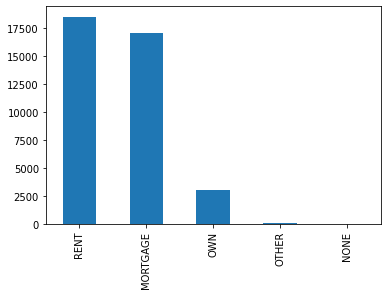

In [31]:
loan_df_final_data.home_ownership.value_counts().plot.bar()
plt.show()

##### Replacing "None" inside "home_ownership" column with most freequent value in the column

In [32]:
loan_df_final_data['home_ownership'] = loan_df_final_data.home_ownership.apply(lambda x : loan_df_final_data['home_ownership'].mode()[0] if x == 'NONE' else x)
loan_df_final_data.home_ownership.value_counts()

RENT        18483
MORTGAGE    17021
OWN          2975
OTHER          98
Name: home_ownership, dtype: int64

##### Removing extra xx from zip as it is same accross all the rows which does not make sense

In [33]:
loan_df_final_data['zip_code'] = loan_df_final_data['zip_code'].apply(lambda x : x[:-2])

# Outlier Identification & Removal

#### Checking Outliers for Annual Income

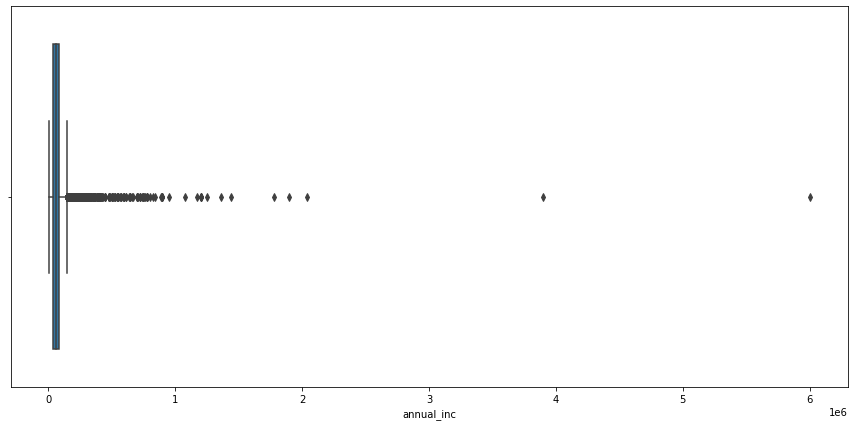

In [34]:
plt.figure(figsize=(15,7))
sns.boxplot(loan_df_final_data, x='annual_inc')
plt.show()

##### Check the Percentile informations

In [35]:
loan_df_final_data.annual_inc.quantile([0.5, 0.75,0.90, 0.95, 0.99])

0.50     58868.0
0.75     82000.0
0.90    115000.0
0.95    140004.0
0.99    234144.0
Name: annual_inc, dtype: float64

##### From the above observations it is evident that there are outliers in annual income value. We are considering all values above 95 percentile as outliers for this excercise

In [36]:
# Basic Statistics with Quantitative Variables

print('Before removing Outliers from Annual Income :\n')
print(loan_df_final_data['annual_inc'].describe(),'\n')

# Removing Outliers i.e. Quantile 0.95 from Annual Income attribute

loan_df_final_data=loan_df_final_data[loan_df_final_data["annual_inc"]< loan_df_final_data["annual_inc"].quantile(0.95)]

print('After removing outliers from annual Income:\n')
print(loan_df_final_data["annual_inc"].describe())

Before removing Outliers from Annual Income :

count    3.857700e+04
mean     6.877797e+04
std      6.421868e+04
min      4.000000e+03
25%      4.000000e+04
50%      5.886800e+04
75%      8.200000e+04
max      6.000000e+06
Name: annual_inc, dtype: float64 

After removing outliers from annual Income:

count     36642.000000
mean      60829.831120
std       27717.831464
min        4000.000000
25%       40000.000000
50%       56000.000000
75%       77704.050000
max      140000.000000
Name: annual_inc, dtype: float64


##### From the below plot it is evident that outliers has been removed from annual income.

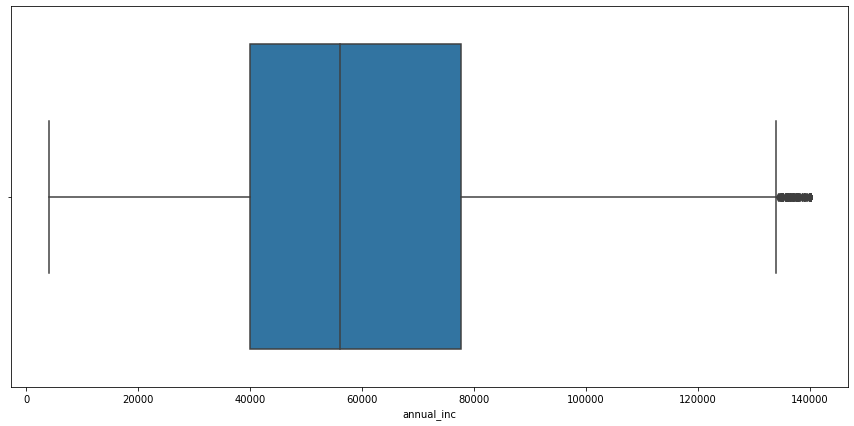

In [37]:
plt.figure(figsize=(15,7))
sns.boxplot(loan_df_final_data, x='annual_inc')
plt.show()

#### Checking Outliers for Loan Amount

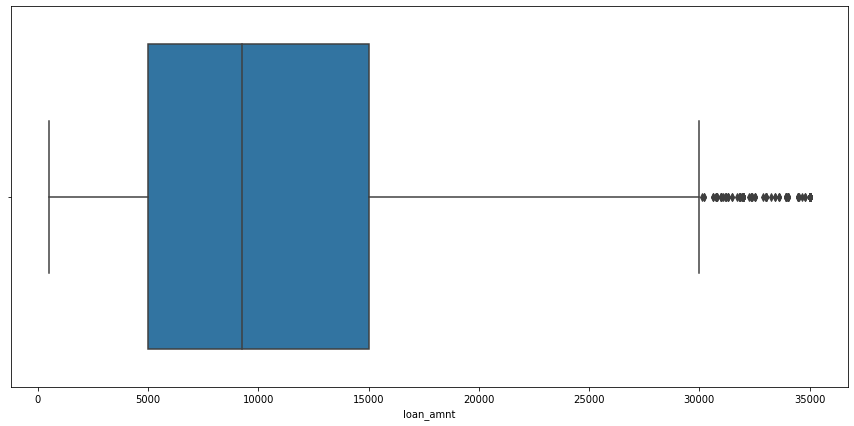

In [38]:
plt.figure(figsize=(15,7))
sns.boxplot(loan_df_final_data, x='loan_amnt')
plt.show()

In [39]:
loan_df_final_data.loan_amnt.quantile([0.5, 0.75,0.90, 0.95, 0.97,0.98, 0.99])

0.50     9250.0
0.75    15000.0
0.90    20000.0
0.95    25000.0
0.97    25475.0
0.98    30000.0
0.99    35000.0
Name: loan_amnt, dtype: float64

##### There are some values far from the distribution, but as the distribution is mostly continuous. So, there is no need to remove outliers / extreme values for these above columns.

#### Checking Outliers for Interest Rate

In [40]:
loan_df_final_data['int_rate'].describe()

count    36642.000000
mean        11.887884
std          3.667161
min          5.420000
25%          8.940000
50%         11.710000
75%         14.270000
max         24.400000
Name: int_rate, dtype: float64

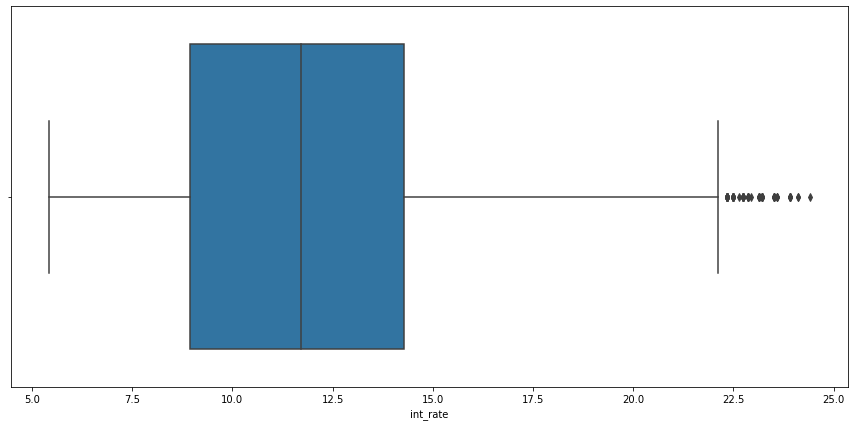

In [41]:
plt.figure(figsize=(15,7))
sns.boxplot(loan_df_final_data, x='int_rate')
plt.show()

##### There are some values far from the distribution, but as the distribution is mostly continuous. So, there is no need to remove outliers / extreme values for these above columns.

# Create Bins for Continuous Variables which can be used during Univariate/MultiVariate Analysis

In [42]:
#Creating categories for loan amounts for further bivariate analysis
loan_df_final_data['loan_amnt_categories']=pd.cut(loan_df_final_data['loan_amnt'],[0,7000,14000,21000,28000,35000],labels=['0-7000','7000-14000','14000-21000','21000-28000','28000+'])

#Creating categories for annual incomes for further bivariate analysis
loan_df_final_data['annual_inc_categories']=pd.cut(loan_df_final_data['annual_inc'],[0,20000,40000,60000,80000,1000000],labels=['0-20000','20000-40000','40000-60000','60000-80000','80000+'])

#Creating categories for interest rates for further bivariate analysis
loan_df_final_data['interest_rate_categories']=pd.cut(loan_df_final_data['int_rate'],[0,10,12.5,16,20],labels=['0-10','10-13','12.5-16','16+'])

#Creating dti into buckets for further bivariate analysis
loan_df_final_data['dti_categories']=pd.cut(loan_df_final_data['dti'],[0,5,10,15,20,25],labels=['0-5','5-10','10-15','15-20','25+'])

print(loan_df_final_data.shape)

loan_df_final_data.head()

(36642, 27)


,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,loan_status,purpose,zip_code,addr_state,dti,pub_rec_bankruptcies,term_in_months,term_in_years,loan_issue_month,loan_issue_year,loan_status_bool,loan_amnt_categories,annual_inc_categories,interest_rate_categories,dti_categories
0,5000,5000,4975.0,10.65,162.87,B,B2,self_employed,10.0,RENT,24000.0,Verified,Fully Paid,credit_card,860,AZ,27.65,0.0,36,3,Dec,2011,0,0-7000,20000-40000,10-13,NaN
1,2500,2500,2500.0,15.27,59.83,C,C4,Ryder,0.0,RENT,30000.0,Source Verified,Charged Off,car,309,GA,1.00,0.0,60,5,Dec,2011,1,0-7000,20000-40000,12.5-16,0-5
2,2400,2400,2400.0,15.96,84.33,C,C5,self_employed,10.0,RENT,12252.0,Not Verified,Fully Paid,small_business,606,IL,8.72,0.0,36,3,Dec,2011,0,0-7000,0-20000,12.5-16,5-10
3,10000,10000,10000.0,13.49,339.31,C,C1,AIR RESOURCES BOARD,10.0,RENT,49200.0,Source Verified,Fully Paid,other,917,CA,20.00,0.0,36,3,Dec,2011,0,7000-14000,40000-60000,12.5-16,15-20
5,5000,5000,5000.0,7.90,156.46,A,A4,Veolia Transportaton,3.0,RENT,36000.0,Source Verified,Fully Paid,wedding,852,AZ,11.20,0.0,36,3,Dec,2011,0,0-7000,20000-40000,0-10,10-15


# Univariate analysis

In [43]:
loan_df_final_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 36642 entries, 0 to 39716
Data columns (total 27 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   loan_amnt                 36642 non-null  int64   
 1   funded_amnt               36642 non-null  int64   
 2   funded_amnt_inv           36642 non-null  float64 
 3   int_rate                  36642 non-null  float64 
 4   installment               36642 non-null  float64 
 5   grade                     36642 non-null  object  
 6   sub_grade                 36642 non-null  object  
 7   emp_title                 36642 non-null  object  
 8   emp_length                36642 non-null  float64 
 9   home_ownership            36642 non-null  object  
 10  annual_inc                36642 non-null  float64 
 11  verification_status       36642 non-null  object  
 12  loan_status               36642 non-null  object  
 13  purpose                   36642 non-null  obje

## Univariate Categorical Analysis

### Univarient Analysis for Loan Status

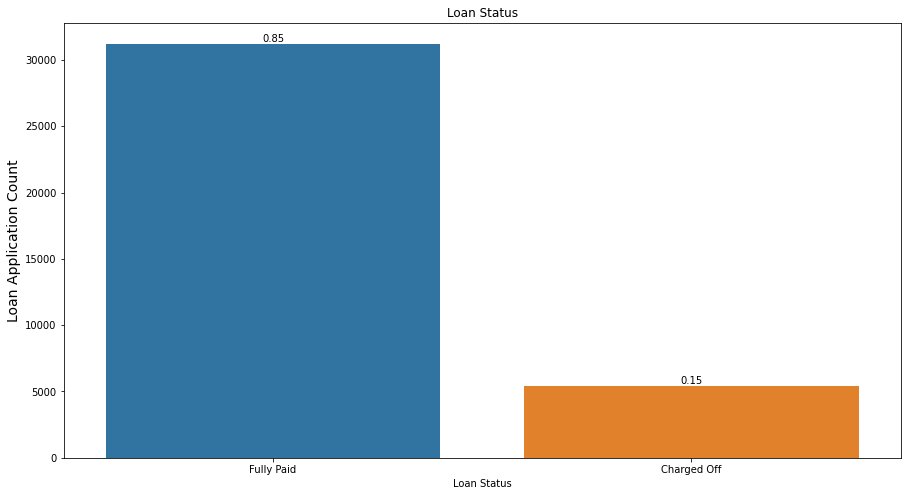

In [44]:
plt.figure(figsize=(15,8))
ax=sns.countplot(x="loan_status",data=loan_df_final_data)
ax.set(title='Loan Status')
ax.set_xlabel('Loan Status')
ax.set_ylabel('Loan Application Count',fontsize=14)
ax.bar_label(container=ax.containers[0], labels=round((loan_df_final_data.loan_status.value_counts())/len(loan_df_final_data.loan_status),2))
plt.show()


##### The above plot shows that around 15% loans were charged off out of the total loans issued

### Univarient Analysis for Purpose of Loan

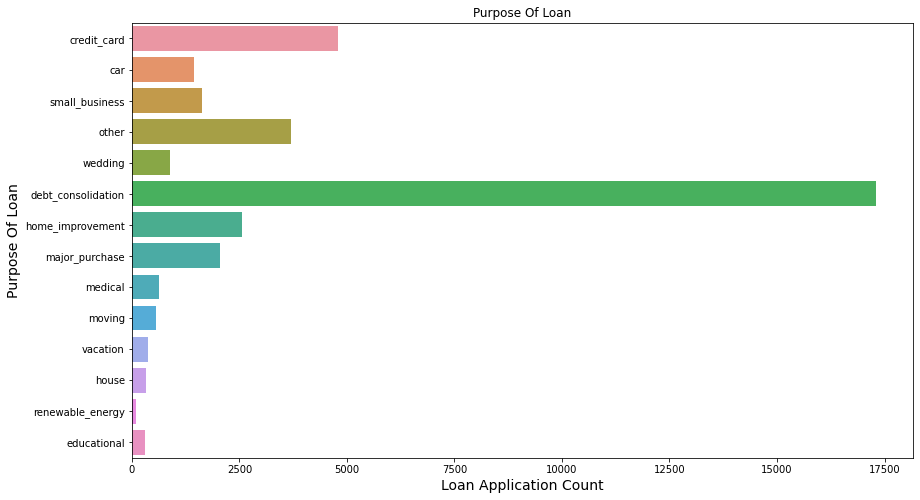

In [45]:
plt.figure(figsize=(14,8))
ax=sns.countplot(y="purpose",data=loan_df_final_data)
ax.set(title='Purpose Of Loan')
ax.set_ylabel('Purpose Of Loan',fontsize=14)
ax.set_xlabel('Loan Application Count',fontsize=14)
plt.show()

##### The above figure shows that most of the loans were taken for the purpose of debt consolidation.

### Univarient Analysis for Home Ownership

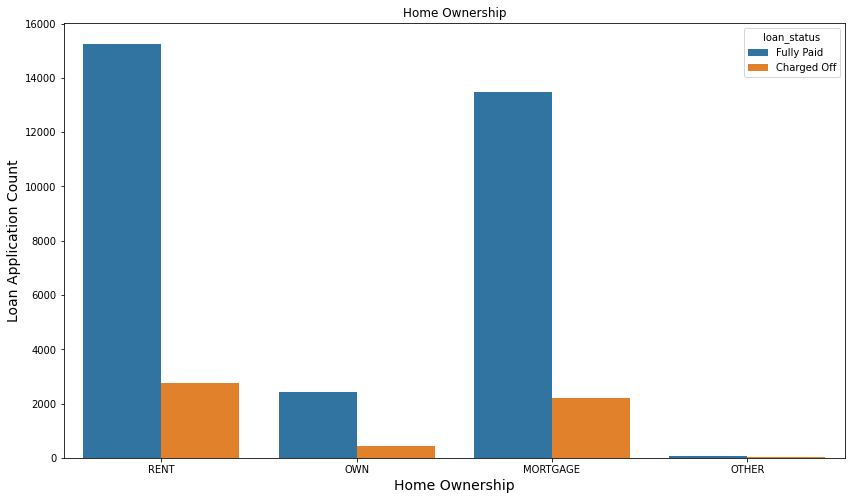

In [46]:
plt.figure(figsize=(14,8))
ax=sns.countplot(x="home_ownership",data=loan_df_final_data,hue='loan_status')
ax.set(title='Home Ownership')
ax.set_xlabel('Home Ownership',fontsize=14)
ax.set_ylabel('Loan Application Count',fontsize=14)
plt.show()

##### From the above figure below analysis we can conlcude that most of loan applicants living in rented home or mortgazed their home. They also have highest number of deafulters

### Univarient Analysis for Loan Tenure

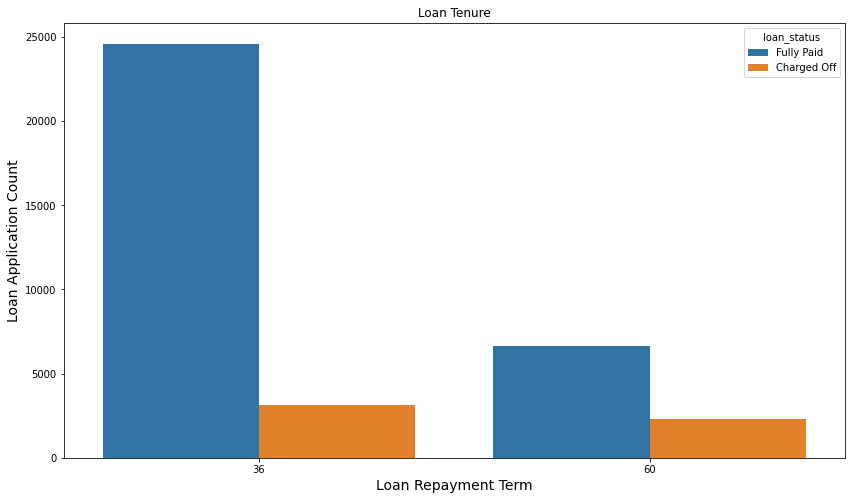

In [47]:
plt.figure(figsize=(14,8))
ax=sns.countplot(x="term_in_months",data=loan_df_final_data,hue='loan_status')
ax.set(title='Loan Tenure')
ax.set_xlabel('Loan Repayment Term',fontsize=14)
ax.set_ylabel('Loan Application Count',fontsize=14)
plt.show()

##### For the above figure, we can say that therer are more applicants taking loan for 36 months and hence more percentage of applicants are getting charged off as compared to 60 months tenure

### Univarient Analysis for Loan Issue Month

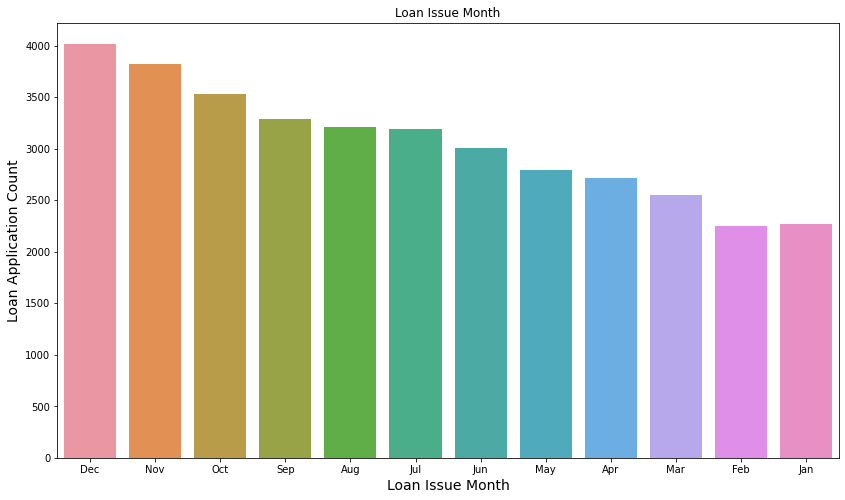

In [48]:
plt.figure(figsize=(14,8))
ax=sns.countplot(x="loan_issue_month",data=loan_df_final_data)
ax.set(title='Loan Issue Month')
ax.set_xlabel('Loan Issue Month',fontsize=14)
ax.set_ylabel('Loan Application Count',fontsize=14)
plt.show()

##### From the above figure we can conclude that People are taking more loans during Holiday seasons of November and Decemeber

### Univarient Analysis for applicant address

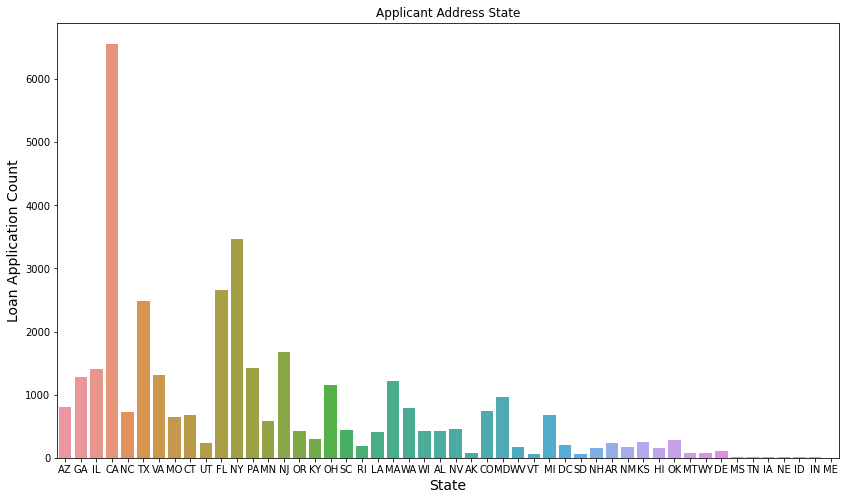

In [49]:
plt.figure(figsize=(14,8))
ax=sns.countplot(x="addr_state",data=loan_df_final_data)
ax.set(title='Applicant Address State')
ax.set_xlabel('State',fontsize=14)
ax.set_ylabel('Loan Application Count',fontsize=14)
plt.show()

#### Top Loan Applications originate from well known progressive states such as CA, NY, FL, TX with larger degree of urbanization, tax rates and higher than average income levels.

### Univarient Analysis Loan Grade

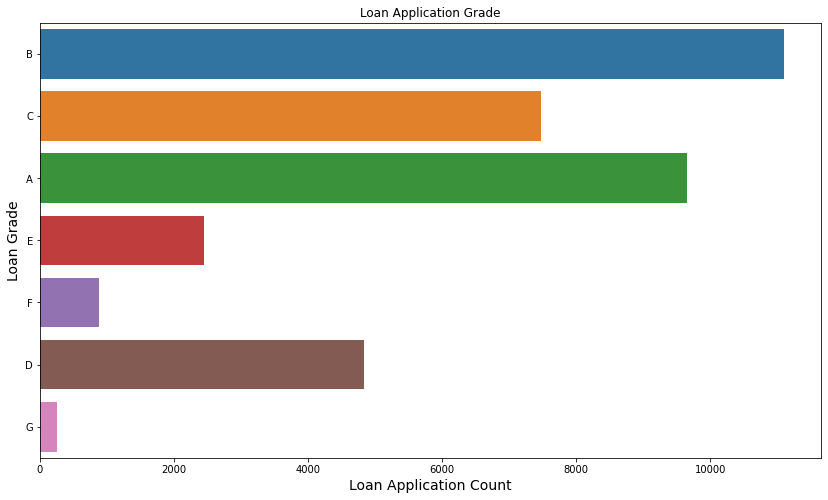

In [50]:
plt.figure(figsize=(14,8))
ax=sns.countplot(y="grade",data=loan_df_final_data)
ax.set(title='Loan Application Grade')
ax.set_ylabel('Loan Grade',fontsize=14)
ax.set_xlabel('Loan Application Count',fontsize=14)
plt.show()

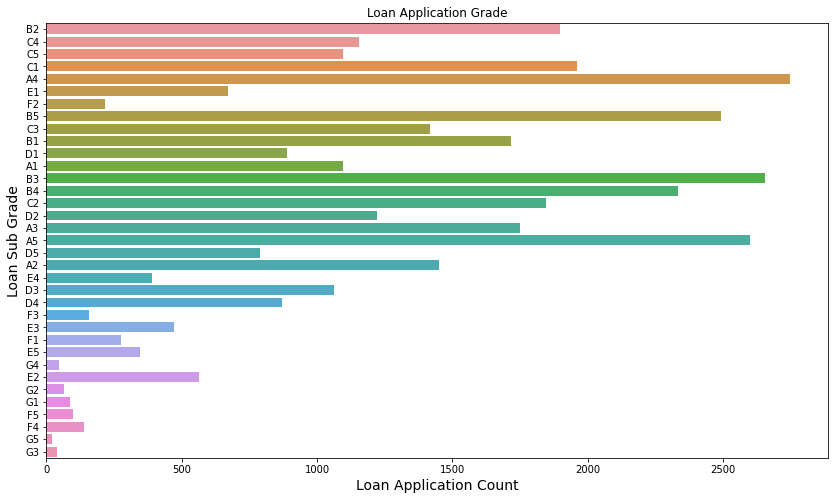

In [51]:
plt.figure(figsize=(14,8))
ax=sns.countplot(y="sub_grade",data=loan_df_final_data)
ax.set(title='Loan Application Grade')
ax.set_ylabel('Loan Sub Grade',fontsize=14)
ax.set_xlabel('Loan Application Count',fontsize=14)
plt.show()

##### From the above figures,it is evident that, most of the loan accounts comprise of the top 3 grades (A, B and C). Most of the applicants are from B grade.

### Univarient Analysis Applicant income source Verification Status

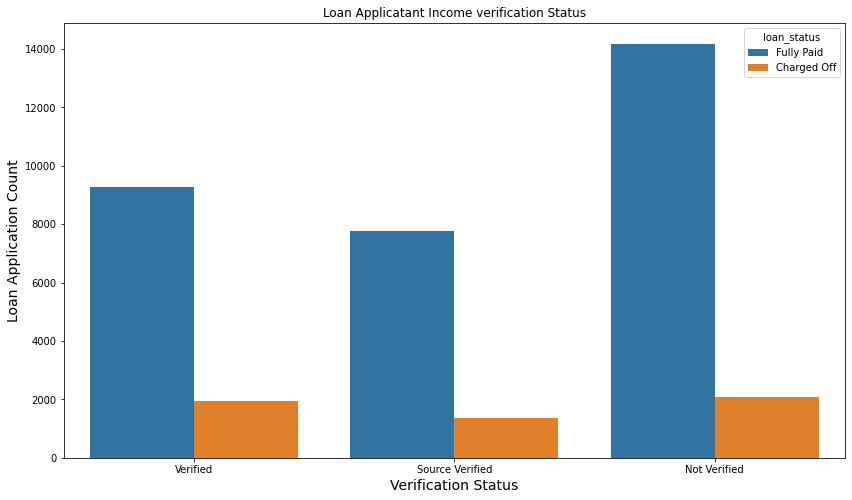

In [52]:
plt.figure(figsize=(14,8))
ax=sns.countplot(x="verification_status",data=loan_df_final_data,hue='loan_status')
ax.set(title='Loan Applicatant Income verification Status')
ax.set_xlabel('Verification Status',fontsize=14)
ax.set_ylabel('Loan Application Count',fontsize=14)
plt.show()

##### For the above figure it is clearn that most of the Loan applicants income source is not verified and has highest loan charged-off counts. Hence the recomendationshould be verify all the applicant income source.

## Univariate Continous Analysis

### Distribution of Loan amounts using distribution plot

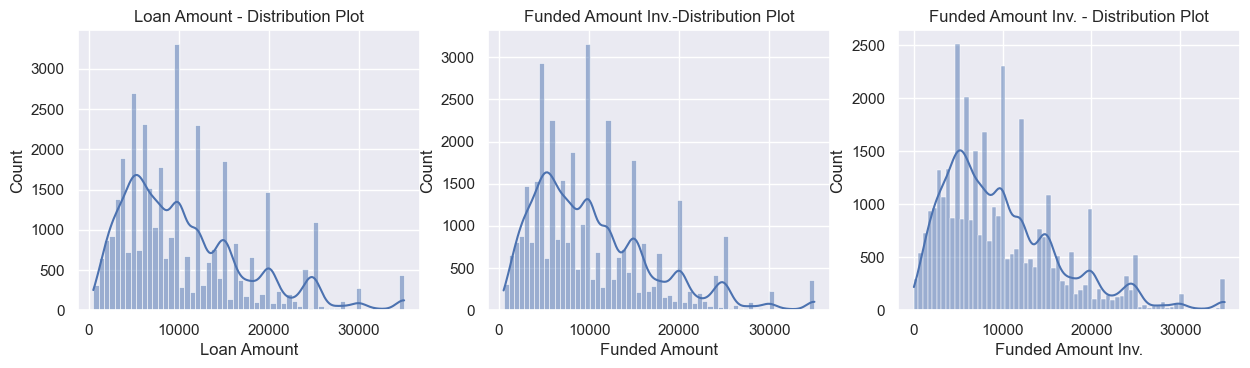

In [493]:
plt.figure(figsize=(15,8))

#subplot1
plt.subplot(2,3,1)
ax=sns.histplot(loan_df_final_data['loan_amnt'],kde=True)
ax.set(title='Loan Amount - Distribution Plot',xlabel='Loan Amount')


#subplot2
plt.subplot(2,3,2)
ax=sns.histplot(loan_df_final_data['funded_amnt'],kde=True)
ax.set(title='Funded Amount Inv.-Distribution Plot',xlabel='Funded Amount')


#subplot3

plt.subplot(2, 3, 3)
ax = sns.histplot(loan_df_final_data['funded_amnt_inv'],kde=True)
ax.set(title='Funded Amount Inv. - Distribution Plot',xlabel='Funded Amount Inv.')

plt.show()

##### Distribution of amounts for all three plots looks very much similar. No Conclusions can be made from this

### Univarient Analysis for Annual Income

Text(0, 0.5, 'Annual Income')

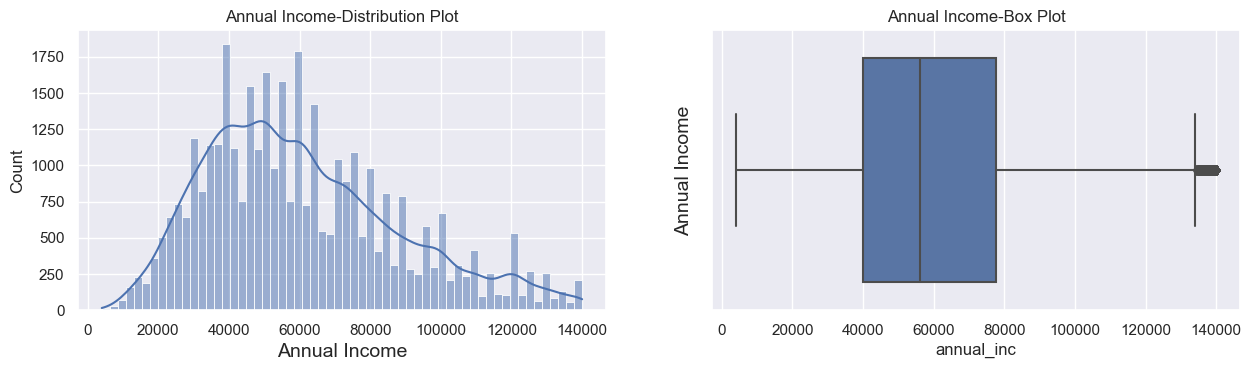

In [494]:
plt.figure(figsize=(15,8))

#Subplot1
plt.subplot(2,2,1)
ax=sns.histplot(loan_df_final_data['annual_inc'],kde=True)
ax.set(title='Annual Income-Distribution Plot')
ax.set_xlabel('Annual Income',fontsize=14)

#Subplot2
plt.subplot(2,2,2)
ax=sns.boxplot(x=loan_df_final_data['annual_inc'])
ax.set(title='Annual Income-Box Plot')
ax.set_ylabel('Annual Income',fontsize=14)

##### From the above figure we can conclude that most of the Annual Income are in the range 35000 USD to 80000 USD

### Univarient Analysis for Loan Amount

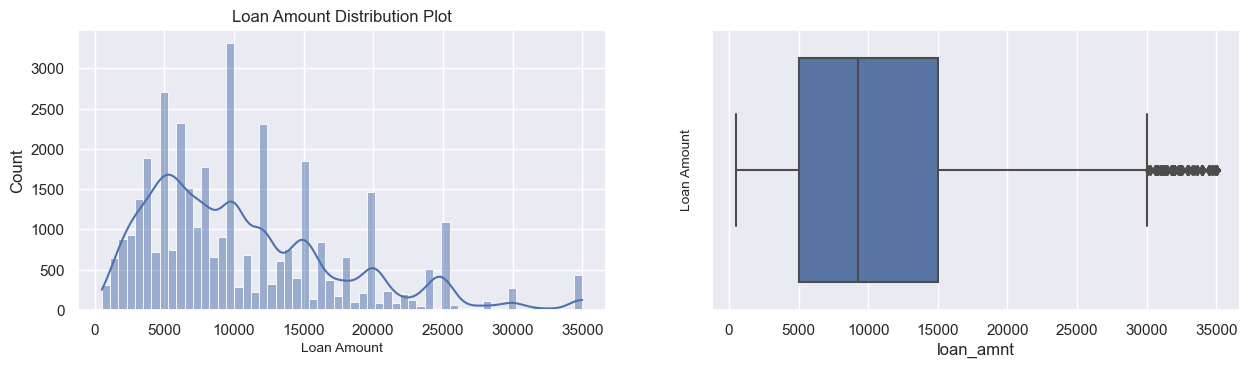

In [495]:
plt.figure(figsize=(15,8))
  
#Subplot 1

plt.subplot(2,2,1)
ax=sns.histplot(loan_df_final_data['loan_amnt'],kde=True)
ax.set(title='Loan Amount Distribution Plot')
ax.set_xlabel('Loan Amount', fontsize=10)

#Subplot 2
plt.subplot(2,2,2)
ax=sns.boxplot(x=loan_df_final_data['loan_amnt'])
ax.set_ylabel('Loan Amount', fontsize=10)
plt.show()

##### From the above figure we can conclude that most of the Loan Amount are in the range 5000 USD to 15000 USD

### Univarient Analysis for Interest Rate

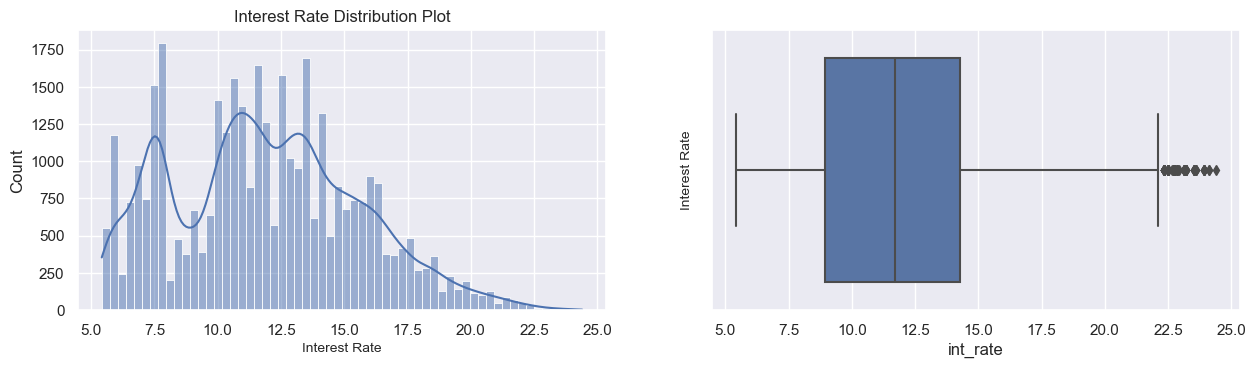

In [496]:
plt.figure(figsize=(15,8))
  
#Subplot 1

plt.subplot(2,2,1)
ax=sns.histplot(loan_df_final_data['int_rate'],kde=True)
ax.set(title='Interest Rate Distribution Plot')
ax.set_xlabel('Interest Rate', fontsize=10)

#Subplot 2
plt.subplot(2,2,2)
ax=sns.boxplot(x=loan_df_final_data['int_rate'])
ax.set_ylabel('Interest Rate', fontsize=10)
plt.show()

##### From the above figure we can conclude that most of the Interest Rate are in the range 10% to 15%

# Bivariate Analysis

### Bivariate correlations Matrix for continuous variables

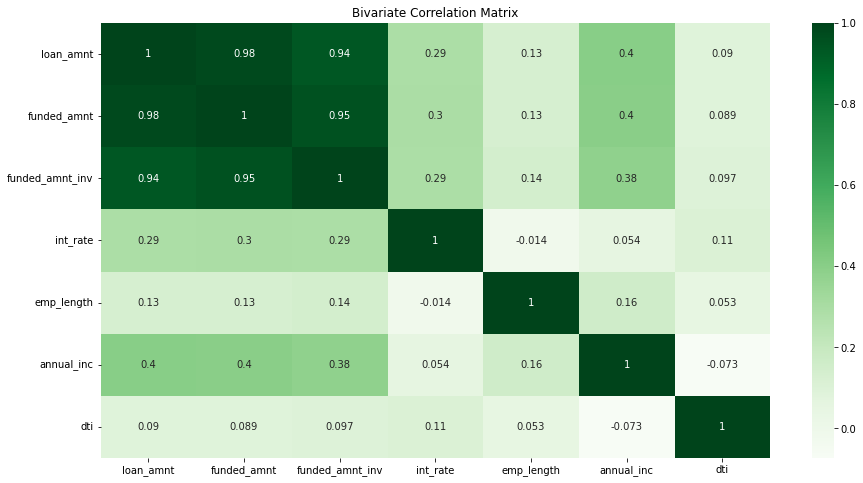

In [53]:
plt.figure(figsize=(15,8))
ax = sns.heatmap(loan_df_final_data[['loan_amnt','funded_amnt','funded_amnt_inv','int_rate','emp_length','annual_inc','dti']].corr(),cmap="Greens",annot=True)
ax.set(title='Bivariate Correlation Matrix')
plt.show()

##### List of Observations from the above correlation Matrix -
1. Annual Income to Debt To Income Ratio i.e. dti are negatively correlated
2. Loan Amount,Investor Amount and Funding Amount are strongly correlated
3. Positive correlation between Annual Income and employment years
4. Positive correlation between annual income and funded amount that means people with high income gets high funded amount

### Create a function to detremine the Bivariate analysis between the loan-charged off percentage and various categorical variables

In [54]:
def plot_bivariante_stats(df_data,feature,label_rotation=False):
    plt.figure(figsize=(10,8))
    sns.set(font_scale=1)

    # Calculate the percentage of loan_status_new =1 per category value
    cat_perc = df_data[[feature, 'loan_status_bool']].groupby([feature],as_index=False).mean()
    cat_perc.sort_values(by='loan_status_bool', ascending=False, inplace=True)
    
    s = sns.barplot(x = feature, y='loan_status_bool', data=cat_perc)
    s.set(title= feature.replace("_"," ").title()+' Vs. Charged-Off Proportion')

    if(label_rotation):
        s.set_xticklabels(s.get_xticklabels(),rotation=90)
    
    plt.ylabel('Percent of charged Off [%]')
    plt.tick_params(axis='both', which='major')
    plt.subplots_adjust(wspace=0.2, top=0.9)
    plt.show();

In [55]:
loan_df_final_data.columns

Index(['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'int_rate',
       'installment', 'grade', 'sub_grade', 'emp_title', 'emp_length',
       'home_ownership', 'annual_inc', 'verification_status', 'loan_status',
       'purpose', 'zip_code', 'addr_state', 'dti', 'pub_rec_bankruptcies',
       'term_in_months', 'term_in_years', 'loan_issue_month',
       'loan_issue_year', 'loan_status_bool', 'loan_amnt_categories',
       'annual_inc_categories', 'interest_rate_categories', 'dti_categories'],
      dtype='object')

### Bivariate Analysis for loan term Vs Defaulter %

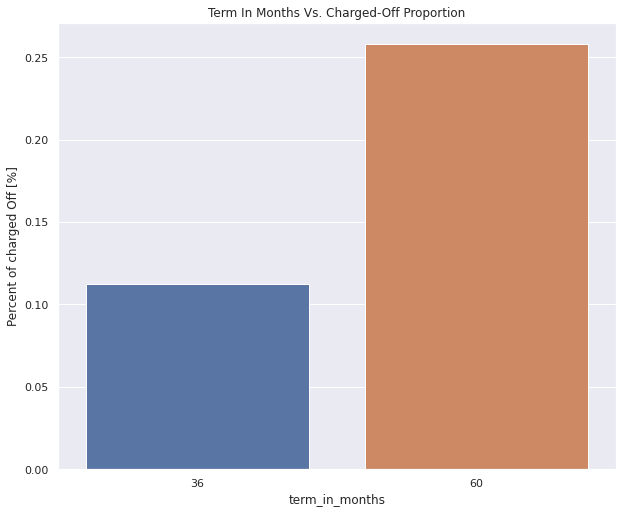

In [56]:
plot_bivariante_stats(loan_df_final_data,'term_in_months')

##### From the above plot it is clear that Loan applicants with 60 months tenure has highest number of Defaults

### Bivariate Analysis for Loan Grade Vs Defaulter %

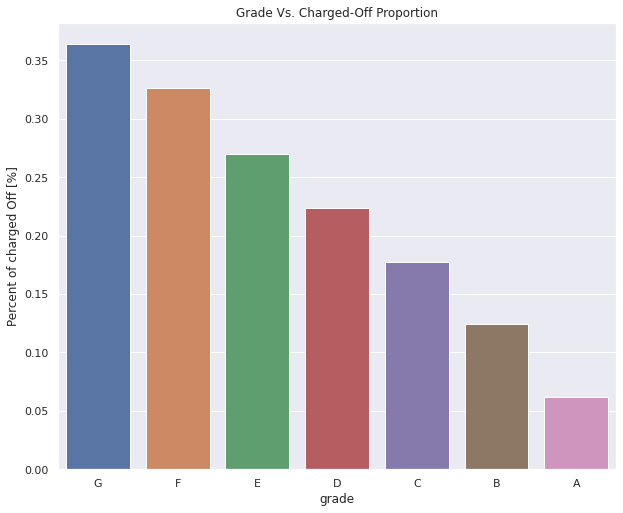

In [57]:
plot_bivariante_stats(loan_df_final_data,'grade')

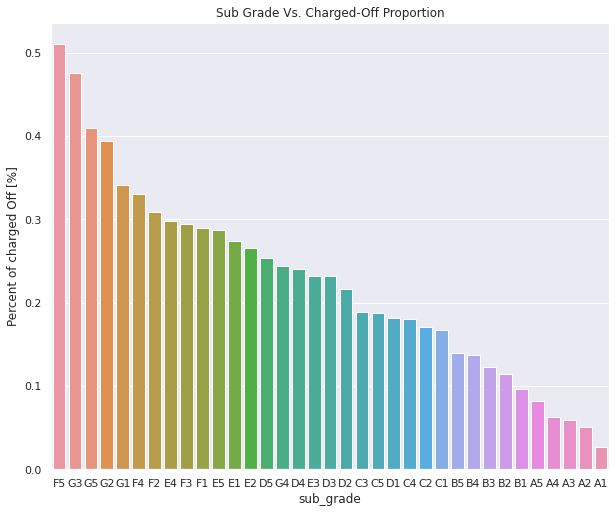

In [58]:
plot_bivariante_stats(loan_df_final_data,'sub_grade')

##### From The above Figures of Grade and Subgrade it is evident that Lower Graded loans Like G, F and E has highest Loan Default percentage

### Bivariate Analysis on Loan Purpose Vs Defaulter %

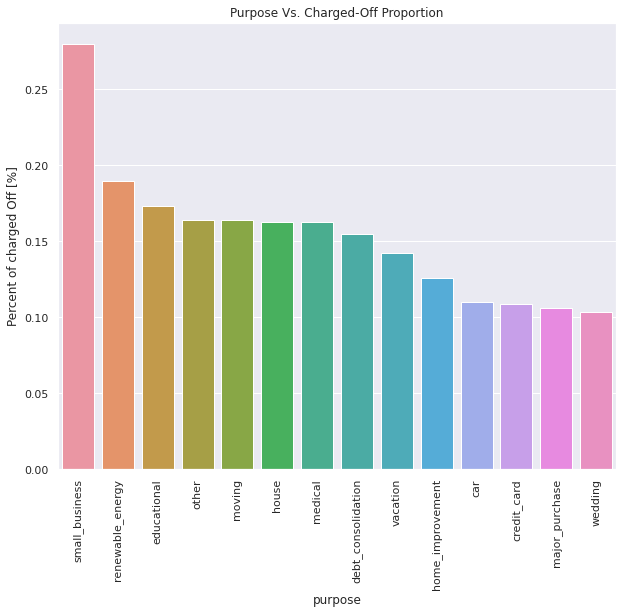

In [59]:
plot_bivariante_stats(loan_df_final_data,'purpose',True)

##### From the above figure it is evedient that Small Business applicants have high chances of getting charged off. Wedding has better chanrged off proportion  as compare to other categories.

### Bivariate Analysis on Loan Issue month Vs Defaulter %

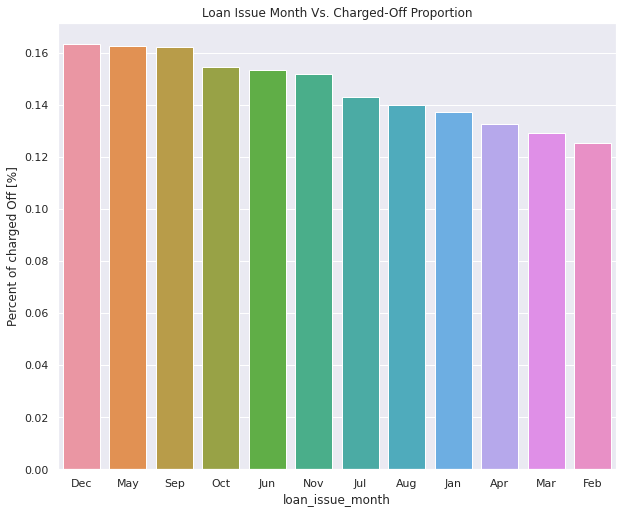

In [60]:
plot_bivariante_stats(loan_df_final_data,'loan_issue_month')

#### Most of the Loan applicants defaults during the Holiday season of December

### Bivariate Analysis on Employee Experience Vs Defaulter %

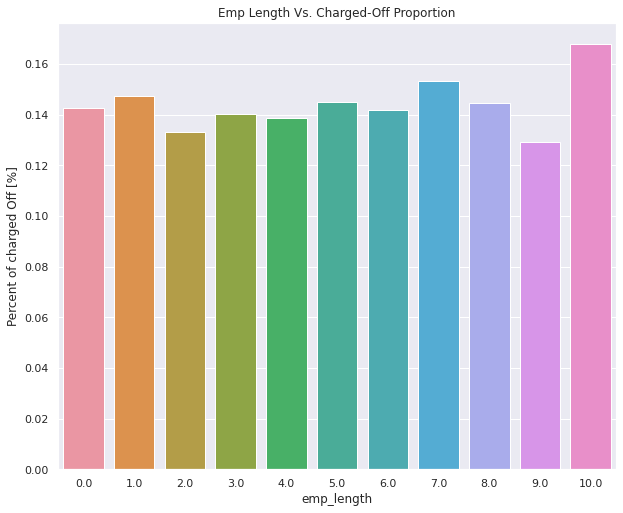

In [61]:
plot_bivariante_stats(loan_df_final_data,'emp_length')

##### Below Observations can be made from above figire
1. Those who are not working or have less than 1 year of work experience have high chances of getting charged off.
2. It makes sense as with less or no experience they don't have source of income to repay loan.
3. Employees with more than 10 years of experience has also Highest default rate. This might be due to starting of any small business which might not be profitable

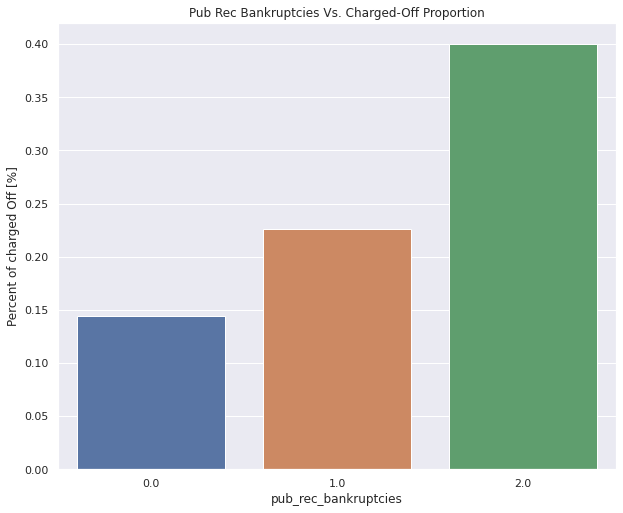

In [62]:
plot_bivariante_stats(loan_df_final_data,'pub_rec_bankruptcies')

##### Below observations can be made from above figure
1. Those who already have pub_rec_bankruptcies value 1, have charged off proportion higher than who have no pub_rec_bankruptcies.
2. pub_rec_bankruptcies count 2 has even higher charged off proportion but those numbers are not significant to decide.

### Bivariate Analysis on Applicant Address State Vs Defaulter %

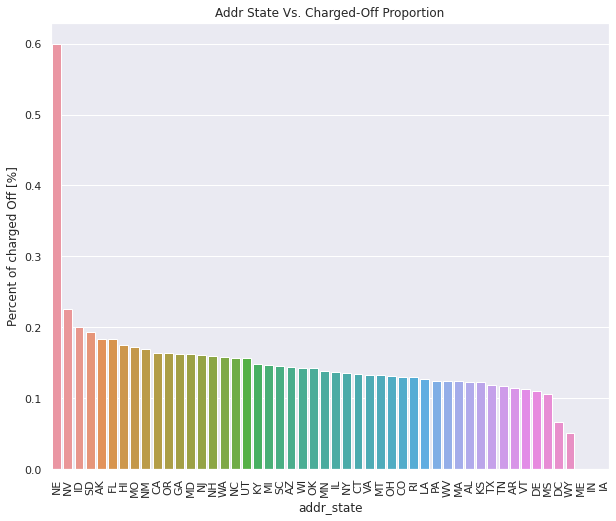

In [63]:
plot_bivariante_stats(loan_df_final_data,'addr_state',True)

##### States NE has very high chances of charged off but number of applications are too low to make any decisions. States NV,CA and FL states shows good number of charged offs against good number of applicants

### Bivariate Analysis on Annual Income of Applicants Vs Defaulter %

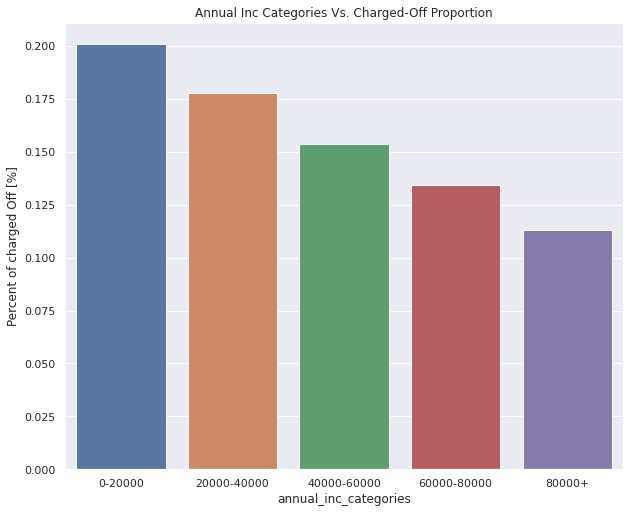

In [64]:
plot_bivariante_stats(loan_df_final_data,'annual_inc_categories')

##### Income range 80000+ has less chances of charged off.Income range 0-20000 has high chances of charged off.

### Bivariate Analysis on Loan Interest Rates Vs Defaulter %

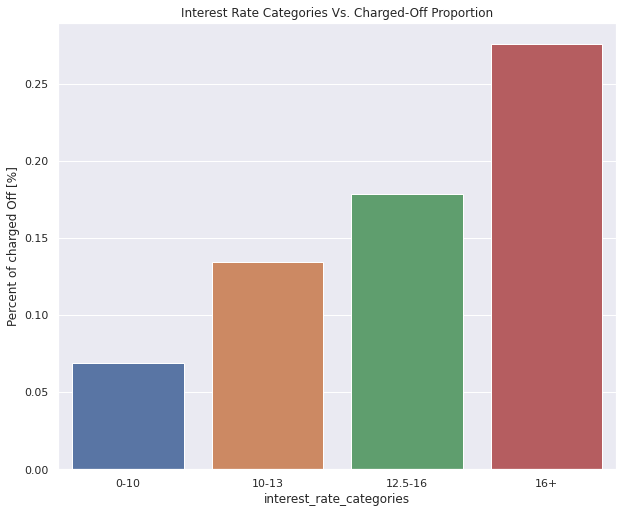

In [65]:
plot_bivariante_stats(loan_df_final_data,'interest_rate_categories')

##### Below observations are made from above plot
1. Interest Rates which are less than 10% have very less chances of charged off.
2. Interest Rates greater than 16 has the highest chances of charged off.
3. Charged Off Proportion increases with higher interest rates

### Bivariate Analysis on Loan Amount Vs Defaulter %

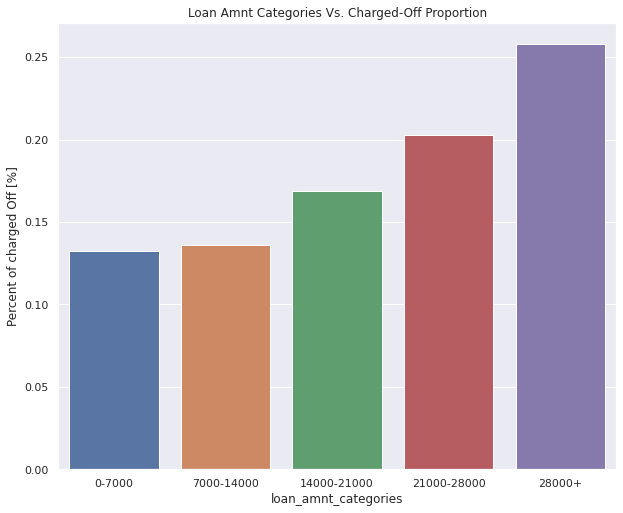

In [66]:
plot_bivariante_stats(loan_df_final_data,'loan_amnt_categories')

##### From the above figure, we can conclude that when the loan amount is high, the risk of defaulting also increses. Capping the loan amounts < 20K USD can potentially reduce default risk at the surface but could spread the default risk to lower categories of loan amounts

### Bivariate Analysis on Debt to Income Ratio of Applicants Vs Defaulter %

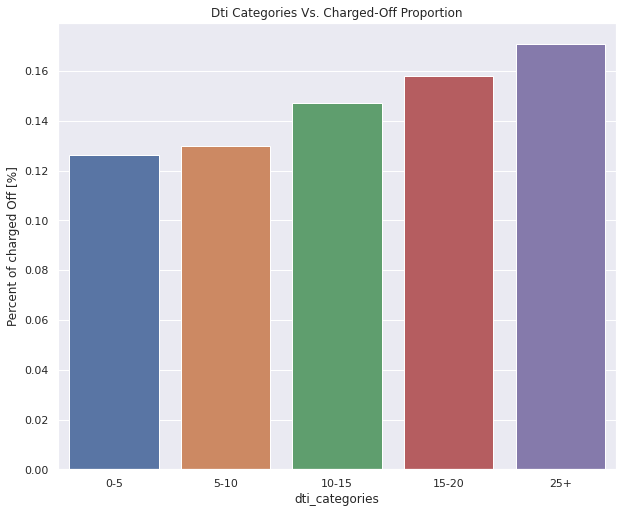

In [67]:
plot_bivariante_stats(loan_df_final_data,'dti_categories')

##### From the above figure, we can conclude that when the Debt to Income Ratio is high, the risk of defaulting also increses. It is wise to provide loans to candidates who has Debt to Income ratio of less than 15.0

# Conclusion

### MAJOR FACTOR INFLUENCING CHARGE OFFs 
1. Higher Interest rate 
2. Higher Loan amount 
3. Lower Annual income 
4. More than 1 Public record of bankruptcies 
5. Unverified Verification status 
6. Home ownership status for "others", "rent" and "mortgage" categories 
7. Lower Grade Loans  
8. Higher Loan Tenure 
9. Top 5 states of applicant pool 
10. Small Business and Renuable Energy Business. 

### RECOMMENDATIONS FOR LENDING CLUB 
1. Prioritize high grade loans. 
2. Scrutinize purpose, state and public bankruptcy record. 
3. Cap loan amounts beyond >20K where the charge off is higher. 
4. Offer reduced repayment tenure less than 60 months.
5. Ensure verification is complete for all loans disbursed. 
6. Provide loans to employees with experience between 1 - 10 years. 
7. The subgrading system needs improvement to accurately show risk of default
8. Disburtion of Year end or holiday season loans must be avoided.